## Exploratory Data Analysis of Historical Stock Prices 2006 - 2016 (Including 2008 Stock Market Crash)

The goal of this project is to practice using Data Analysis to determine trends and visualize our analysis using Python libraries.

The stocks for this project are from the major US Investment Banks. 

Specifically:
    
- Bank of America
- CitiGroup
- Goldman Sachs
- JPMorgan Chase
- Morgan Stanley
- Wells Fargo

The data will be taken from a pickle file found online.


## Imports and Reading in Data

In [5]:
# Data Science Imports

import pandas as pd
import numpy as np
import seaborn as sns
import datetime
import matplotlib.pyplot as plt
%matplotlib inline

# Machine Learning

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix

In [6]:
# Pickle file with stock data from Jan 1st 2006 to Jan 1st 2016

df = pd.read_pickle('all_banks')

Check the head of the df dataframe.

In [7]:
df.head()

Bank Ticker    BAC                                     C                       \
Stock Info    Open   High    Low  Close    Volume   Open   High    Low  Close   
Date                                                                            
2006-01-03   46.92  47.18  46.15  47.08  16296700  490.0  493.8  481.1  492.9   
2006-01-04   47.00  47.24  46.45  46.58  17757900  488.6  491.0  483.5  483.8   
2006-01-05   46.58  46.83  46.32  46.64  14970900  484.4  487.8  484.0  486.2   
2006-01-06   46.80  46.91  46.35  46.57  12599800  488.8  489.0  482.0  486.2   
2006-01-09   46.72  46.97  46.36  46.60  15620000  486.0  487.4  483.0  483.9   

Bank Ticker           ...     MS                                  WFC         \
Stock Info    Volume  ...   Open   High    Low  Close   Volume   Open   High   
Date                  ...                                                      
2006-01-03   1537660  ...  57.17  58.49  56.74  58.31  5377000  31.60  31.98   
2006-01-04   1871020  ...  58.70  59.28  58.35  58.35  7977800  31.80  31.82   
2006-01-05   1143160  ...  58.55  58.59  58.02  58.51  5778000  31.50  31.56   
2006-01-06   1370250  ...  58.77  58.85  58.05  58.57  6889800  31.58  31.78   
2006-01-09   1680740  ...  58.63  59.29  58.62  59.19  4144500  31.68  31.82   

Bank Ticker                          
Stock Info     Low  Close    Volume  
Date                                 
2006-01-03   31.20  31.90  11016400  
2006-01-04   31.36  31.53  10871000  
2006-01-05   31.31  31.50  10158000  
2006-01-06   31.38  31.68   8403800  
2006-01-09   31.56  31.68   5619600  

[5 rows x 30 columns]

In [8]:
df.describe()

Bank Ticker          BAC                                                       \
Stock Info          Open         High          Low        Close        Volume   
count        2517.000000  2517.000000  2517.000000  2517.000000  2.517000e+03   
mean           22.205217    22.479182    21.894076    22.174617  1.333590e+08   
std            15.308041    15.406193    15.197964    15.304852  1.274974e+08   
min             3.220000     3.510000     2.530000     3.140000  4.836000e+06   
25%            12.310000    12.450000    12.130000    12.270000  4.845598e+07   
50%            15.780000    15.970000    15.600000    15.790000  1.015867e+08   
75%            32.730000    33.600000    31.750000    32.630000  1.752694e+08   
max            55.040000    55.080000    54.820000    54.900000  1.226791e+09   

Bank Ticker            C                                                       \
Stock Info          Open         High          Low        Close        Volume   
count        2517.000000  2517.000000  2517.000000  2517.000000  2.517000e+03   
mean          145.661124   147.401685   143.602412   145.372658  2.859715e+07   
std           177.547336   178.987879   175.987635   177.409683  2.982102e+07   
min             4.550000     0.000000     4.500000     4.520000  6.328600e+05   
25%            39.500000    40.090000    38.780000    39.380000  1.008514e+07   
50%            49.430000    49.920000    48.890000    49.390000  2.183961e+07   
75%           197.400000   204.600000   190.400000   196.900000  3.878944e+07   
max           566.000000   570.000000   555.500000   564.100000  5.131787e+08   

Bank Ticker  ...           MS                                         \
Stock Info   ...         Open         High          Low        Close   
count        ...  2517.000000  2517.000000  2517.000000  2517.000000   
mean         ...    36.022133    36.559186    35.443925    36.006198   
std          ...    18.666122    18.815168    18.516753    18.669476   
min          ...     9.190000    10.210000     6.710000     9.200000   
25%          ...    23.800000    24.460000    23.270000    23.870000   
50%          ...    30.400000    30.790000    29.960000    30.340000   
75%          ...    40.110000    41.050000    39.590000    40.210000   
max          ...    90.770000    90.950000    88.330000    89.300000   

Bank Ticker                        WFC                                         \
Stock Info         Volume         Open         High          Low        Close   
count        2.517000e+03  2517.000000  2517.000000  2517.000000  2517.000000   
mean         1.764023e+07    35.600727    36.015542    35.169110    35.598411   
std          1.690477e+07    10.010587     9.928720    10.105723    10.012581   
min          1.120500e+06     8.650000     8.940000     7.800000     8.120000   
25%          8.676259e+06    28.410000    28.990000    27.950000    28.490000   
50%          1.391242e+07    33.410000    33.890000    33.020000    33.500000   
75%          2.164847e+07    41.060000    41.420000    40.790000    41.220000   
max          3.297860e+08    58.730000    58.760000    58.070000    58.520000   

Bank Ticker                
Stock Info         Volume  
count        2.517000e+03  
mean         3.293280e+07  
std          3.572992e+07  
min          2.392000e+06  
25%          1.381537e+07  
50%          2.317952e+07  
75%          3.796472e+07  
max          4.787366e+08  

[8 rows x 30 columns]

In [9]:
df.shape

(2517, 30)

# 1. Exploratory Data Analysis (EDA)

## 1.1 Closing Price

The Closing Price of a stock is the last price at which a stock trades during a regular trading session. Let's first find the max closing price of the stock trades as a series.

In [10]:
df.xs('Close', axis = 1, level = 'Stock Info').max()

Bank Ticker
BAC     54.90
C      564.10
GS     247.92
JPM     70.08
MS      89.30
WFC     58.52
dtype: float64

Let's create a DataFrame for returns. It will contain the returns for each bank's stock as defined by:

$$r_t = \frac{p_t - p_{t-1}}{p_{t-1}} = \frac{p_t}{p_{t-1}} - 1$$

where $r_t$ is the return, and $p_t$ and $p_{t-1}$ are the closing price of current day and previous day respectively.

In [11]:
returns = pd.DataFrame()

To implement the formula, we can use a pandas method called pct_change() and just apply it to each bank stock ticker through a for loop. I then set it as a column in the returns DataFrame.

In [12]:
tickers = ['BAC', 'C', 'GS', 'JPM', 'MS', 'WFC']

for ticker in tickers:
    returns[ticker + ' Returns'] = df[ticker]['Close'].pct_change()
returns.head()

,BAC Returns,C Returns,GS Returns,JPM Returns,MS Returns,WFC Returns
Date,,,,,,
2006-01-03,NaN,NaN,NaN,NaN,NaN,NaN
2006-01-04,-0.010620,-0.018462,-0.013812,-0.014183,0.000686,-0.011599
2006-01-05,0.001288,0.004961,-0.000393,0.003029,0.002742,-0.000951
2006-01-06,-0.001501,0.000000,0.014169,0.007046,0.001025,0.005714
2006-01-09,0.000644,-0.004731,0.012030,0.016242,0.010586,0.000000


## 1.2 Comparing Returns

Let's visualize this data using a pairplot and plot each bank's return against the others. This will give us a sense of how well they did against each other in terms of returns.

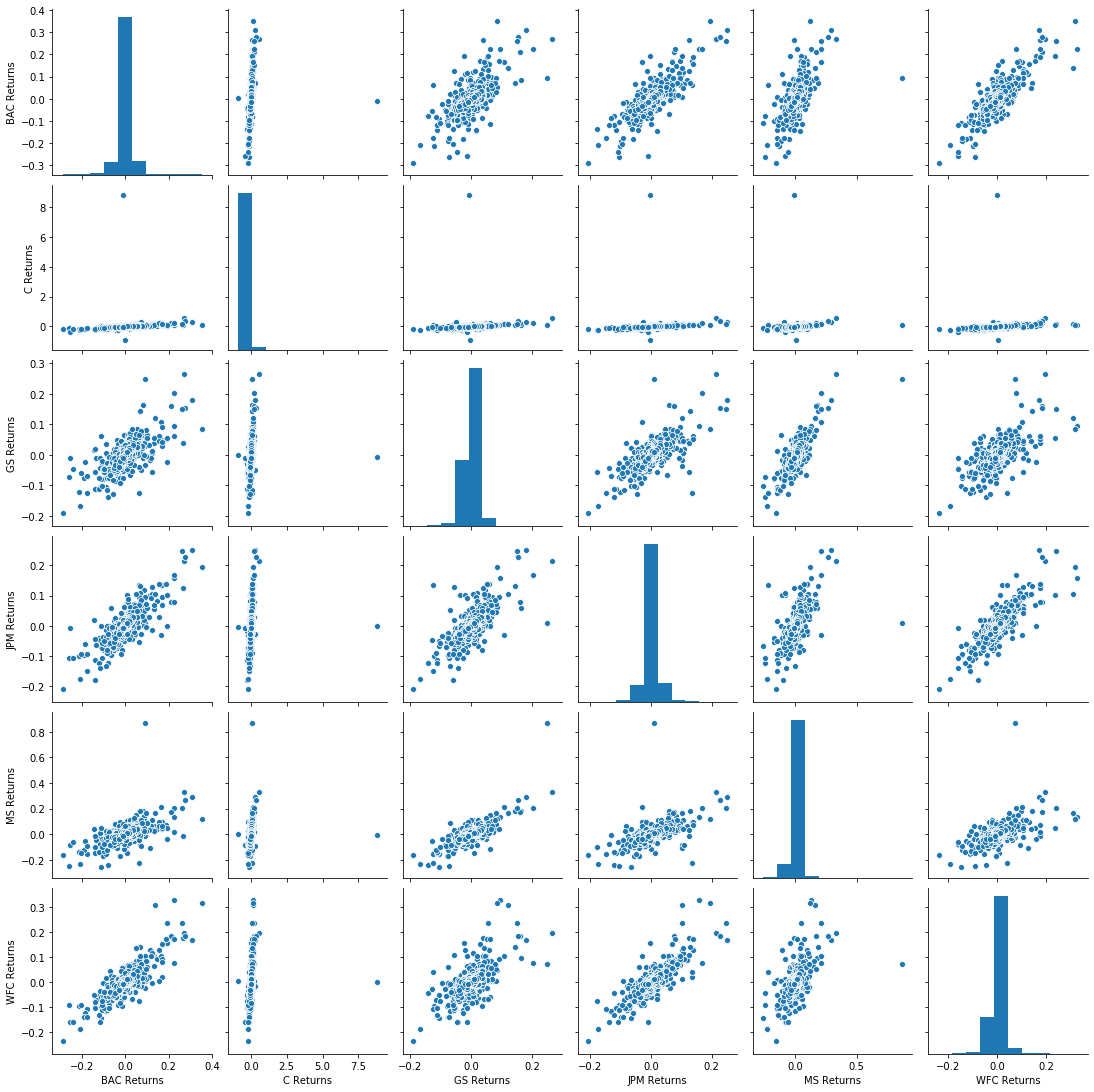

In [13]:
sns.pairplot(returns)

Already, we can see an interesting pattern emerging for CitiGroup in particular. It would seem that their returns are significantly worse when compared to the other banks.

This indicated that some significant economic event happened to CitiGroup and caused this loss. Upon further research, it was determined that by November 2008, CitiGroup had become insolvent (More liabilities than assets). According to Wikipedia, they announced plans for tens of thousands of job cuts and its stock market value dropped tremendously from \\$244 billion to \\$20.5 billion. Individual shares were being traded well below \\$1.00 on the NYSE.

Let's confirm this significant drop by doing a line plot of the close price of each bank across its entire timeline.

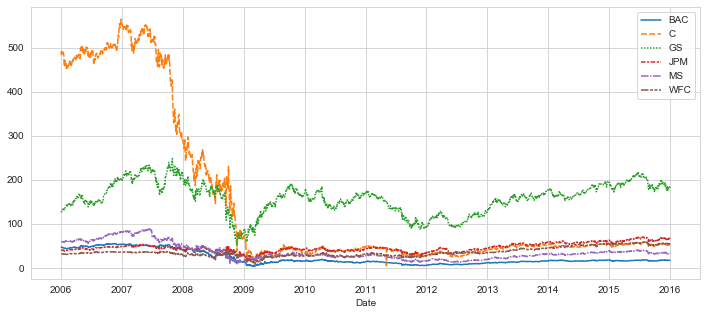

In [14]:
sns.set_style('whitegrid')
plt.figure(figsize = (12, 5))
sns.lineplot(data = df.xs(key = 'Close', level = 'Stock Info', axis = 1))

As we can see from this plot, a significant drop is apparently from late 2008 to late 2009, which confirms our theory and makes sense accordingly to our research.

## 1.3 Single Day Extremes

Let's see if we can find anything else of significance from our data. For example, let's figure out on what dates each bank stock at the best and worst single day returns.

In [12]:
# Worst single day returns
returns.idxmin()

BAC Returns   2009-01-20
C Returns     2011-05-06
GS Returns    2009-01-20
JPM Returns   2009-01-20
MS Returns    2008-10-09
WFC Returns   2009-01-20
dtype: datetime64[ns]

In [13]:
# Best single day returns
returns.idxmax()

BAC Returns   2009-04-09
C Returns     2011-05-09
GS Returns    2008-11-24
JPM Returns   2009-01-21
MS Returns    2008-10-13
WFC Returns   2008-07-16
dtype: datetime64[ns]

From a quick scan of the dates, we can notice 2 things in particular.

1. Four of the major banks share the same day for the worst drop.
    - Further research shows that this day was the inauguration day for President Obama. According to The Guardian's article of the day, the reason for it being the worst single day of returns was due to the President's policies for tougher regulation on US Banks.


2. CitiGroup's largest drop and biggest gain were very close to one another.
    - Further research shows that May 9th, 2011 was the announcement of the effectiveness of CitiGroup's 1-for-10 reverse stock split as of May 6th, 2011; the day of its worst returns.


## 1.4 Standard Deviations and Risk

Next, let's explore the standard deviation of the returns. This can give us some insight as to which stocks are more risky (biggest fluctuations in returns). This can be taken a step further by specifying time ranges to give a more accurate picture of the circumstances at a particular time period.

In [14]:
# Overall standard deviation of returns

returns.std()

BAC Returns    0.036650
C Returns      0.179969
GS Returns     0.025346
JPM Returns    0.027656
MS Returns     0.037820
WFC Returns    0.030233
dtype: float64

We see here that by far the biggest standard deviation for returns is CitiGroup. This makes sense as according to our previous analysis, CitiGroup suffered the most during the stock crashes at this time. We can then safely note that CitiGroup's stock is the riskiest during the time period of our analysis.

In [15]:
# Standard deviation of returns in 2015

returns['2015'].std()

BAC Returns    0.016163
C Returns      0.015289
GS Returns     0.014046
JPM Returns    0.014017
MS Returns     0.016249
WFC Returns    0.012591
dtype: float64

For the standard deviation in 2015, which is the most recent period of our dataset, it seems that the standard deviation of each bank's returns has leveled out. It is worth noting however, that comparatively, Morgan Stanley's std remains the highest.

Let's create a distplot of the 2015 returns for Morgan Stanley to explore this insight further.

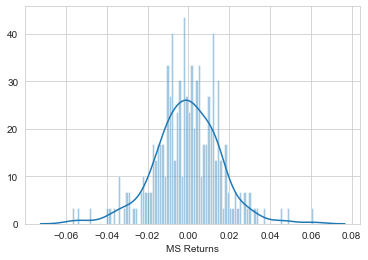

In [16]:
sns.distplot(returns['MS Returns']['2015'], bins = 100)

We can see that there is some variance here, but the returns still follow a normal distribution for the most part. Maybe we can draw more insights if we compare it to the distplots of other banks' returns.

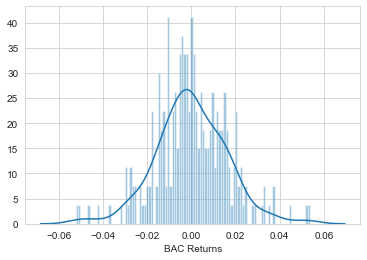

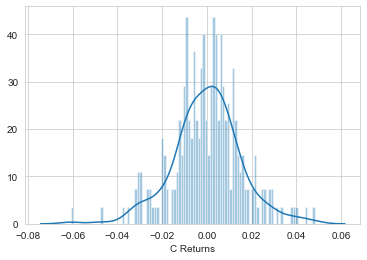

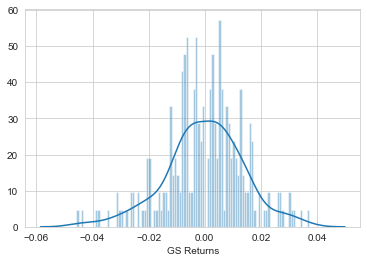

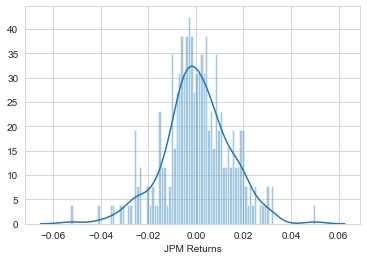

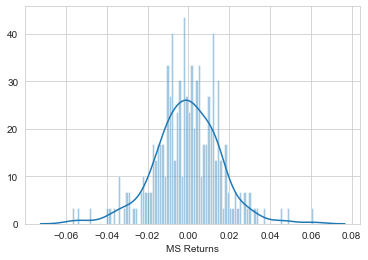

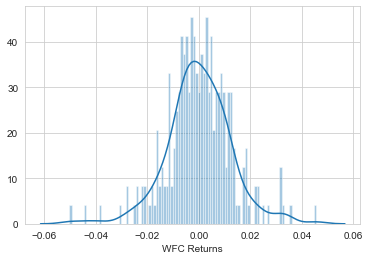

In [17]:
for ticker in tickers:
    plt.figure()
    sns.distplot(returns[ticker + ' Returns']['2015'], bins = 100)

The use of kde lines show where the data is densest. It is worth noting that for most banks, there are rarely any returns that are greater than +/- 0.04.

## 1.5 Moving Averages

One interesting form of analysis is moving averages. These can be useful as they are able to smooth data, reducing noise and forming trends that are more easily seen and interpreted. The concept is simple, they are calculated by the sum of data points in a time interval divided by the number of time periods therein.


$$\bar{p}_{SM} = \frac{1}{n}\sum_{i=0}^{n-1}p_{M-i}$$

Let's analyze the moving averages for these stocks in the year 2008, with rolling 30 day averages of the Close Price for Bank of America's stocks against the regular Close Price also of Bank of America.


In [19]:
df.xs(key = 'Close', axis = 1, level = 'Stock Info')['BAC']['2008']

Date
2008-01-02    40.56
2008-01-03    40.30
2008-01-04    39.85
2008-01-07    39.90
2008-01-08    38.41
              ...  
2008-12-24    13.53
2008-12-26    13.36
2008-12-29    12.94
2008-12-30    13.24
2008-12-31    14.08
Name: BAC, Length: 253, dtype: float64

Date
2008-01-02    40.56
2008-01-03    40.30
2008-01-04    39.85
2008-01-07    39.90
2008-01-08    38.41
              ...  
2008-12-24    13.53
2008-12-26    13.36
2008-12-29    12.94
2008-12-30    13.24
2008-12-31    14.08
Name: BAC, Length: 253, dtype: float64

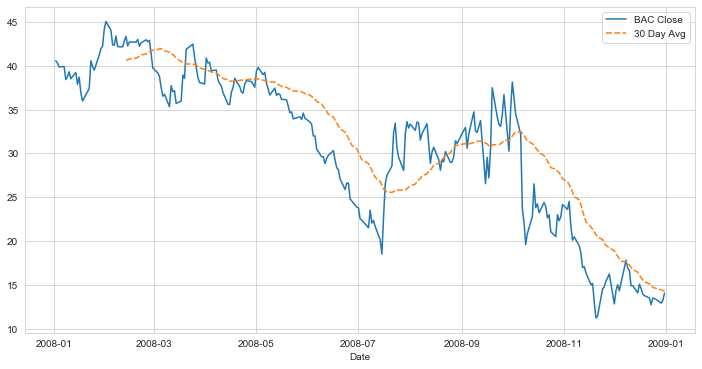

In [228]:
plt.figure(figsize = (12, 6))
# Concatenate our two data, the second one being the rolling 30 day average
list_data = pd.concat([df.xs(key = 'Close', axis = 1, level = 'Stock Info')['BAC']['2008'], df.xs(key = 'Close', axis = 1, level = 'Stock Info')['BAC']['2008'].rolling(window = 30).mean()], axis = 1)
list_data.columns = ['BAC Close', '30 Day Avg']
sns.lineplot(data = list_data)


Similar to all of our analyses up to this point, there are significant dips in 2008 that is made clearer to see through the use of rolling 30 day averages.

## 1.6 Correlation Heatmap

Let's take a look at some correlations between the Close Price of banks' stocks.

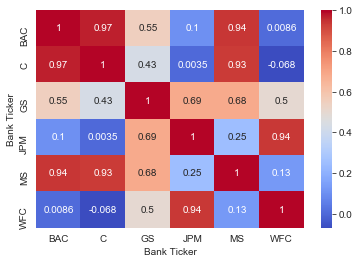

In [21]:
sns.heatmap(df.xs(key = 'Close', axis = 1, level = 'Stock Info').corr(), annot = True, cmap = 'coolwarm')

Interestingly enough, there is significant correlation between the close price of Bank of America, Morgan Stanley and CitiGroup, as well as between JP Morgan Chase and Wells Fargo. This could be an incentive to not buy similar stocks from highly correlated banks as it would be akin to investing in all your money into the same bank. This results in a high risk, "all your eggs in one basket" approach to trading.

Disclaimer: All data is from 2006-2016 so this should not be taken as literal financial advice. I am not a professional trader in any form, these are just my insights and interesting observations that I have made based on the data I got.

# 2. Machine Learning Predictions

Machine learning is an application of artificial intelligence that allows systems to automatically learn and predict from experience without being explicitly programmed. In our case, I thought that it would be interesting to try to predict closing stock prices of the aforementioned banks.

There are many models within machine learning that are used for these tasks. For our case, we will explore simple linear regression first, and then move on to some of the more complicated models if needed.

## 2.1 Linear Regression

#### The goal of linear regression is to minimize the vertical distance between all data points vs line of best fit.

Simple Linear Regression is a statistical method that allows us to study relationships between two continuous variables (x and y)

$$y = \beta_0 + \beta_1 x$$

where:

- $y$ is the response
- $x$ is the feature
- $\beta_0$ is the intercept
- $\beta_1$ is the coefficient for x (slope)

$\beta_0$ and $\beta_1$ are referred to as model coefficients.

In terms of machine learning, we must train our model to find the values of these model coefficients, then use the model to predict testing values.

How do get the values of the model coefficients?

<b>Least Squares Method:</b> The concept of minimizing the sum of the squares of the residuals (error). To visualize a residual, it is the difference between the y component of a data point and the line of best fit.

### 2.1.1 Using Train Test Split

Let's start off with making a copy of our previous dataframe df which has all our data, but extract only what we need for training this machine learning model. For sake of readability, we will choose to do this on the Bank of America stock.

In [215]:
lr_df = df.drop(['C', 'GS', 'JPM', 'MS', 'WFC'], axis = 1).copy()
lr_df

Bank Ticker    BAC                               
Stock Info    Open   High    Low  Close    Volume
Date                                             
2006-01-03   46.92  47.18  46.15  47.08  16296700
2006-01-04   47.00  47.24  46.45  46.58  17757900
2006-01-05   46.58  46.83  46.32  46.64  14970900
2006-01-06   46.80  46.91  46.35  46.57  12599800
2006-01-09   46.72  46.97  46.36  46.60  15620000
...            ...    ...    ...    ...       ...
2015-12-24   17.32  17.38  17.22  17.27  29373415
2015-12-28   17.22  17.23  16.98  17.13  41777497
2015-12-29   17.25  17.35  17.16  17.28  45670376
2015-12-30   17.20  17.24  17.04  17.05  35066378
2015-12-31   17.01  17.07  16.83  16.83  47152968

[2517 rows x 5 columns]

Now we must split out data into feature and response (independent vs dependent). Since we are trying to predict the closing price of BAC stocks, we will make the closing price our response, and everything else the feature.

In [176]:
X = lr_df.drop('Close', level = 'Stock Info', axis = 1)
y = lr_df.xs(key = 'Close', axis = 1, level = 'Stock Info')
print(X)
print(y)

Bank Ticker    BAC                        
Stock Info    Open   High    Low    Volume
Date                                      
2006-01-03   46.92  47.18  46.15  16296700
2006-01-04   47.00  47.24  46.45  17757900
2006-01-05   46.58  46.83  46.32  14970900
2006-01-06   46.80  46.91  46.35  12599800
2006-01-09   46.72  46.97  46.36  15620000
...            ...    ...    ...       ...
2015-12-24   17.32  17.38  17.22  29373415
2015-12-28   17.22  17.23  16.98  41777497
2015-12-29   17.25  17.35  17.16  45670376
2015-12-30   17.20  17.24  17.04  35066378
2015-12-31   17.01  17.07  16.83  47152968

[2517 rows x 4 columns]
Bank Ticker    BAC
Date              
2006-01-03   47.08
2006-01-04   46.58
2006-01-05   46.64
2006-01-06   46.57
2006-01-09   46.60
...            ...
2015-12-24   17.27
2015-12-28   17.13
2015-12-29   17.28
2015-12-30   17.05
2015-12-31   16.83

[2517 rows x 1 columns]


Now we must split our data into training and testing data. This makes it so that we can evaluate how well our model does in predicting the testing data after we've trained it.

In [177]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

Next, we will create an instance of our linear regression model, and train it using the training data we split previously.

In [178]:
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

Now that our model is done training, we can begin making predictions based on testing data.

In [179]:
lr_predictions = lr_model.predict(X_test)

### 2.1.2 Evaluation

To understand if our model worked, we must evaluate the performance against some metrics. In our case, let's evaluate the performance by calculating the different errors.

In [180]:
print('Mean Absolute Error: ', metrics.mean_absolute_error(lr_predictions, y_test))
print('Mean Squared Error: ', metrics.mean_squared_error(lr_predictions, y_test))
print('Root Mean Squared Error: ', np.sqrt(metrics.mean_squared_error(lr_predictions, y_test)))

Mean Absolute Error:  0.12859607715658045
Mean Squared Error:  0.04737775621807665
Root Mean Squared Error:  0.21766432003908368


Wow! The error is tiny! This does make sense as we split our data randomly using train_test_split. 

Let's also take a look at the residuals with a histogram. We want to make sure that it looks normally distributed to confirm that our work is correct.

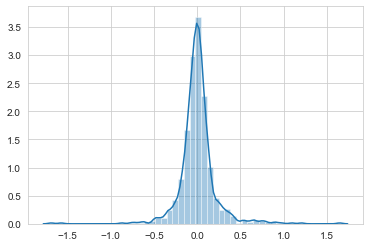

In [181]:
sns.distplot(y_test - lr_predictions, bins = 50)

Great. Now that we have a solid model, we can apply it to new data if we want and make further predictions. However, for the purposes of this project, I want to work with the data we have. The problem with what we did is that now we have no more data left to work with. 

What if we go back and train our data using the first 7 years and predict the last 3?

### 2.1.3 Training Past and Predicting Recent (for lack of a better name)

For this, our process will remain largely the same, but we won't be using scikit-learn's built in train_test_split function. Instead, we will split the data ourselves.

In [15]:
lr_df = df.drop(['C', 'GS', 'JPM', 'MS', 'WFC'], axis = 1).copy()
lr_df.head()
X = lr_df.drop('Close', level = 'Stock Info', axis = 1)
y = lr_df.xs(key = 'Close', axis = 1, level = 'Stock Info', drop_level = 'Bank Ticker')

In [16]:
# Split into 2 parts
# For training it will be 2006 to 2013
# For testing it will be 2014 to 2016

X_train = X.loc['2006-01-03':'2014-01-01']
y_train = y.loc['2006-01-03':'2014-01-01']
X_test = X.loc['2014-01-01':'2016-01-01']
y_test = y.loc['2014-01-01':'2016-01-01']

In [17]:
lr1_model = LinearRegression()
lr1_model.fit(X_train, y_train)
lr1_predictions = lr1_model.predict(X_test)

### 2.1.4 Evaluating new Linear Regression Model

In [18]:
print('Mean Absolute Error: ', metrics.mean_absolute_error(lr1_predictions, y_test))
print('Mean Squared Error: ', metrics.mean_squared_error(lr1_predictions, y_test))
print('Root Mean Squared Error: ', np.sqrt(metrics.mean_squared_error(lr1_predictions, y_test)))

Mean Absolute Error:  0.06227743204761673
Mean Squared Error:  0.007071837632765737
Root Mean Squared Error:  0.08409421878325368


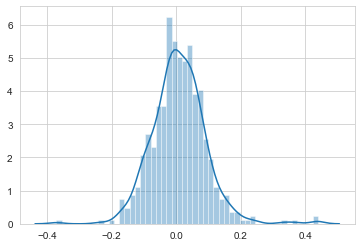

In [19]:
sns.distplot(y_test - lr1_predictions, bins = 50)

Somehow our new prediction was even better than the first in terms of error! Although judging purely from the histograms, we can see that the new model has more standout discrepancies between predicted and actual Closing prices. Let's take a look at the plot of the original closing price vs the plot of the closing price with our predicted 2014-2016.

In [20]:
# Removing the bank ticker level as it's irrelevant to our data
lr_df = lr_df.droplevel('Bank Ticker', axis = 1)

In [21]:
# Concatenate firstPortion and secondPortion to form the predicted values
# firstPortion is the close price of BAC from 2006-2014, this part is the same for both graphs
# secondPortion is the linear regression predicted close price of BAC from 2014-2016
secondPortion = pd.DataFrame(lr1_predictions, columns = ['Predicted'])
secondPortion['time'] = list(lr_df.loc['2014-01-01':'2016-01-01'].index)
secondPortion.set_index('time', inplace = True)

firstPortion = pd.DataFrame(lr_df.loc['2006-01-03':'2014-01-01']['Close'])
firstPortion.columns = ['Predicted']
predictedData = pd.concat([firstPortion, secondPortion])

In [22]:
actualData = pd.DataFrame(lr_df['Close'])
actualData.columns = ['Actual']

Now that we have the data for the actual close price as well as the predicted close price for 2014-2016, let compare the two plots.

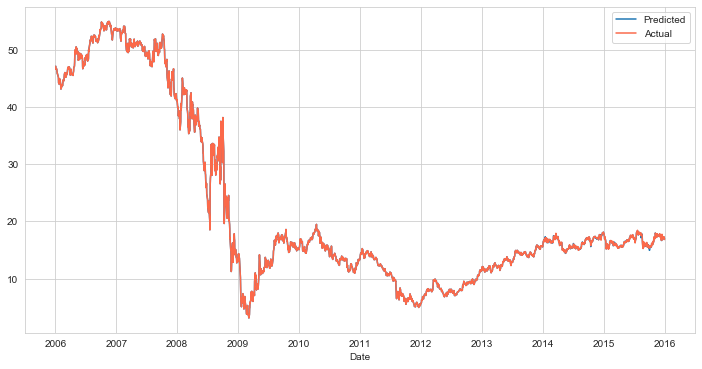

In [23]:
plt.figure(figsize = (12, 6))
sns.lineplot(data = predictedData)
sns.lineplot(data = actualData, palette = 'Reds')

As we have discovered before, the model's prediction was extremely close to the actual values, so much so that we can hardly tell the difference unless we zoom in to the 2014-2016 time period where the prediction occurred.

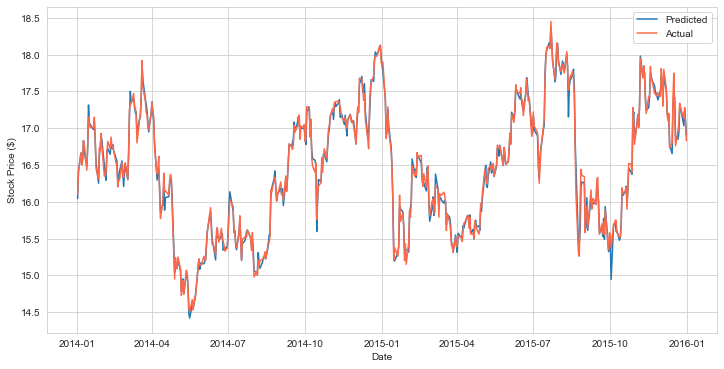

In [24]:
plt.figure(figsize = (12, 6))
sns.lineplot(data = predictedData.loc['2014-01-01':'2016-01-01'])
sns.lineplot(data = actualData.loc['2014-01-01':'2016-01-01'], palette = 'Reds')
plt.ylabel('Stock Price ($)')
plt.legend()

As we can see, there is some variance between Bank of America's actual close price vs the predicted close price, but the difference is extremely small. When I initially saw this, I was expecting this to be due to overfitting. 

Overfitting is a phenomenon where the model learns the errors and noise from a training data set, leading it to perform well for learned data but poorly when generalized for new data. There are a number of ways to prevent overfitting, one of which we employed through cross validation with splitting our data into training and testing sets. However, even with the splitting of our data, it still performed exceptionally well. As a next step, we can use this model for new data that the algorithm has not seen before. This will really show how well our data is generalized and if it is truly free from overfitting.

I am actually quite surprised at the effectiveness of this model's prediction and how low the error margin is. As for next steps, we can explore other machine learning models, but given how effective the linear regression model was, it is unlikely that we'll see much improvement.